In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
df_full = pd.read_csv('complaints.csv')
df_full.count

<bound method DataFrame.count of        Date received           Product                            Sub-product  \
0          3/12/2014          Mortgage                         Other mortgage   
1          10/1/2016  Credit reporting                                    NaN   
2         10/17/2016     Consumer Loan                           Vehicle loan   
3           6/8/2014       Credit card                                    NaN   
4          9/13/2014   Debt collection                            Credit card   
...              ...               ...                                    ...   
903978     4/10/2017   Debt collection                            Credit card   
903979      2/7/2017   Debt collection  Other (i.e. phone, health club, etc.)   
903980      1/4/2017          Mortgage            Conventional fixed mortgage   
903981     9/28/2015   Debt collection               Non-federal student loan   
903982     8/19/2016   Debt collection                            Payday loan   

                                           Issue  \
0       Loan modification,collection,foreclosure   
1         Incorrect information on credit report   
2                     Managing the loan or lease   
3                                     Bankruptcy   
4                          Communication tactics   
...                                          ...   
903978     Cont'd attempts collect debt not owed   
903979     Cont'd attempts collect debt not owed   
903980  Application, originator, mortgage broker   
903981           Disclosure verification of debt   
903982     Cont'd attempts collect debt not owed   

                                   Sub-issue  \
0                                        NaN   
1                             Account status   
2                                        NaN   
3                                        NaN   
4                 Frequent or repeated calls   
...                                      ...   
903978                      Debt is not mine   
903979                      Debt is not mine   
903980                                   NaN   
903981  Not given enough info to verify debt   
903982                      Debt is not mine   

                             Consumer complaint narrative  \
0                                                     NaN   
1       I have outdated information on my credit repor...   
2       I purchased a new car on XXXX XXXX. The car de...   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
903978                                                NaN   
903979  I had an account with XXXX in XX/XX/XXXX this ...   
903980  I was contacted on XX/XX/XXXX email by XXXX fr...   
903981                                                NaN   
903982  I had a debit that was included in my chapter ...   

                                  Company public response  \
0                                                     NaN   
1       Company has responded to the consumer and the ...   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
903978  Company has responded to the consumer and the ...   
903979  Company believes it acted appropriately as aut...   
903980                                                NaN   
903981   Company chooses not to provide a public response   
903982  Company believes it acted appropriately as aut...   

                                       Company State ZIP code            Tags  \
0                         M&T BANK CORPORATION    MI    48382             NaN   
1       TRANSUNION INTERMEDIATE HOLDINGS, INC.    AL    352XX             NaN   
2               CITIZENS FINANCIAL GROUP, INC.    PA    177XX  Older American   
3 

In [3]:
df_full['Product'].unique()

array(['Mortgage', 'Credit reporting', 'Consumer Loan', 'Credit card',
       'Debt collection', 'Student loan', 'Bank account or service',
       'Other financial service', 'Prepaid card', 'Money transfers',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Credit card or prepaid card', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Virtual currency'],
      dtype=object)

In [4]:
df_full.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


In [5]:
df_filtered = df_full[df_full['Product'].isin(['Mortgage','Credit reporting, credit repair services, or other personal consumer reports', 'Consumer Loan',  'Debt collection'])]

In [6]:
df_filtered['Product'].unique()

array(['Mortgage', 'Consumer Loan', 'Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports'],
      dtype=object)

In [7]:
df_filtered.shape

(504555, 18)

In [8]:
df = df_filtered[['Consumer complaint narrative', 'Product']]
df.shape

(504555, 2)

In [9]:
df.head()

,Consumer complaint narrative,Product
0,NaN,Mortgage
2,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
4,NaN,Debt collection
5,NaN,Mortgage
6,NaN,Debt collection


In [10]:
df.isna().sum()

Consumer complaint narrative    395913
Product                              0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.shape

<ipython-input-11-1e8442348ac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(108642, 2)

In [12]:
df['Product'].value_counts()

Debt collection                                                                 47915
Mortgage                                                                        36582
Credit reporting, credit repair services, or other personal consumer reports    14671
Consumer Loan                                                                    9474
Name: Product, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
                                            df['Consumer complaint narrative'], df['Product'],
                                            test_size=0.25, random_state=0, stratify=df['Product'])
print(f'Training utterances: {len(X_train)} of shape {X_train.shape}')
print(f'Validation utterances: {len(X_test)} of shape {X_test.shape}')

Training utterances: 81481 of shape (81481,)
Validation utterances: 27161 of shape (27161,)


In [14]:
display(y_train.value_counts())

Debt collection                                                                 35936
Mortgage                                                                        27436
Credit reporting, credit repair services, or other personal consumer reports    11003
Consumer Loan                                                                    7106
Name: Product, dtype: int64

In [15]:
display(y_test.value_counts())

Debt collection                                                                 11979
Mortgage                                                                         9146
Credit reporting, credit repair services, or other personal consumer reports     3668
Consumer Loan                                                                    2368
Name: Product, dtype: int64

In [16]:
# instantiate the vectorizer object
vectorizer = TfidfVectorizer(stop_words= 'english')
# convert the documents into a matrix
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)
X_train_vec, X_test_vec

(<81481x54367 sparse matrix of type '<class 'numpy.float64'>'
 	with 4482024 stored elements in Compressed Sparse Row format>,
 <27161x54367 sparse matrix of type '<class 'numpy.float64'>'
 	with 1489304 stored elements in Compressed Sparse Row format>)

In [17]:
type(X_train_vec)

scipy.sparse._csr.csr_matrix

In [18]:
from sklearn.feature_selection import SelectKBest, chi2

n_features=1000

ch2 = SelectKBest(chi2, k=n_features)
X_train_sp = ch2.fit_transform(X_train_vec, y_train)
X_test_sp  = ch2.transform(X_test_vec)

X_train_sp, X_test_sp

(<81481x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 2239676 stored elements in Compressed Sparse Row format>,
 <27161x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 748201 stored elements in Compressed Sparse Row format>)

In [19]:
# Converting the sparse matrix to a dense one to visualize it.

cols = list(range(n_features))

X_train_dense = pd.DataFrame(data=X_train_sp.toarray(), columns=cols)
X_test_dense  = pd.DataFrame(data=X_test_sp.toarray(), columns=cols)
print(X_train_dense.shape, X_test_dense.shape)
X_train_dense

(81481, 1000) (27161, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.032125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.216004,0.152307,0.045543,0.000000
1,0.107688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.113458,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.061570,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.237065,0.501473,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.322453,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81476,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.594315,0.000000,0.000000
81477,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
81478,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
81479,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.109372,0.0,0.0,0.0,0.000000,0.040207,0.000000,0.000000


In [20]:
# Now we have train and test data as vectors
# Let us also convert the target data appropriately


encoder = LabelEncoder()
y_train_num  = encoder.fit_transform(y_train)
y_test_num   = encoder.transform(y_test)
y_train_num.min(), y_train_num.max(), y_test_num.min(), y_test_num.max() # sanity check

(0, 3, 0, 3)

In [21]:
y_train_num

array([1, 0, 3, ..., 2, 0, 0])

In [22]:
mapping = {l: i for i, l in enumerate(encoder.classes_)}
mapping

{'Consumer Loan': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 1,
 'Debt collection': 2,
 'Mortgage': 3}

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Model Comparison
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

results = {}
for name, model in models.items():
    # Define the pipeline including text processing and classification model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('chi2', SelectKBest(chi2, k=n_features)),
        ('classifier', model)
    ])
    # Train the model
    pipeline.fit(X_train, y_train)
    # Evaluate the model
    accuracy = pipeline.score(X_test, y_test)
    results[name] = accuracy

# Print the comparative model output accuracy
for name, accuracy in results.items():
    print(f'{name}: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest: 0.9152093074629064
Logistic Regression: 0.8992673318360885
K-Nearest Neighbors: 0.7822981480799676
Support Vector Machine: 0.9171238172379514
Naive Bayes: 0.8594308015168808


**Based on the above model accuracy comparison, SVM and Random Forest model give better accuracy score, so we will pick one of these model to derive inferences.**

In [37]:
rf_model  = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs = -1)
scores = cross_val_score(rf_model,
                         X_train_dense,
                         y_train_num,
                         cv=5,
                         n_jobs = -1,
                         scoring = 'accuracy')
scores.mean()

0.9088745036485086

In [38]:
scores

array([0.90544272, 0.90856652, 0.90715513, 0.90954836, 0.91365979])

In [39]:
rf_model.fit(X_train_dense, y_train_num)
preds=rf_model.predict(X_test_dense)
print('Predictions ready')

Predictions ready


In [40]:
preds

array([2, 1, 2, ..., 3, 3, 2])

In [41]:
preds=encoder.inverse_transform(preds)
preds[0]

'Debt collection'

In [42]:
report = pd.DataFrame(columns=['Complaint','Actual Product','Prediction'])

In [43]:
report['Complaint']      = X_test
report['Actual Product'] = y_test
report['Prediction']     = preds
report

,Complaint,Actual Product,Prediction
271827,"XXXX XXXX XXXX XXXX XXXX XXXX , XXX...",Debt collection,Debt collection
885870,Equifax does n't allow me to see my credit rep...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
528871,XXXX and it 's designated debt collection comp...,Debt collection,Debt collection
835086,After their first Levy was removed and before ...,Debt collection,Debt collection
861362,This company has been calling every phone numb...,Debt collection,Debt collection
...,...,...,...
884338,I have worked and worked after seeing my Credi...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
508865,I began the process of saving our home under t...,Mortgage,Mortgage
246404,We had a mortgage loan with Huntington Bank an...,Mortgage,Mortgage
111552,XXXX months ago we submitted a complaint again...,Mortgage,Mortgage


In [44]:
report['Correct'] = (report['Actual Product'] == report['Prediction']).astype('int')
display(report)
print(f'Accuracy: {100*report.Correct.sum()/report.Correct.count()} %')

,Complaint,Actual Product,Prediction,Correct
271827,"XXXX XXXX XXXX XXXX XXXX XXXX , XXX...",Debt collection,Debt collection,1
885870,Equifax does n't allow me to see my credit rep...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1
528871,XXXX and it 's designated debt collection comp...,Debt collection,Debt collection,1
835086,After their first Levy was removed and before ...,Debt collection,Debt collection,1
861362,This company has been calling every phone numb...,Debt collection,Debt collection,1
...,...,...,...,...
884338,I have worked and worked after seeing my Credi...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1
508865,I began the process of saving our home under t...,Mortgage,Mortgage,1
246404,We had a mortgage loan with Huntington Bank an...,Mortgage,Mortgage,1
111552,XXXX months ago we submitted a complaint again...,Mortgage,Mortgage,1


Accuracy: 91.52093074629063 %


In [45]:
r = pd.DataFrame()
r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']
r['Overall Predicted']   = report.groupby('Prediction').count()['Correct']
r['Actuals']             = report.groupby('Actual Product').count()['Correct']
r

<ipython-input-45-a322a2e95b6b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']


,Correctly Predicted,Overall Predicted,Actuals
Actual Product,,,
Consumer Loan,1453,1690,2368
"Credit reporting, credit repair services, or other personal consumer reports",3091,3357,3668
Debt collection,11458,12648,11979
Mortgage,8856,9466,9146


In [46]:
print(rf_model.score(X_test_dense, y_test_num))

0.9152093074629064


In [47]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,labels,size=10, rotate_labels=False):
    '''
    This function receives a confusion matrix object and plots it out using seaborn
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    font_specs = {"size": 20, 'fontweight':'bold'}
    title_specs= {"size": 16, 'fontweight':'bold'}
    figsize = size
    fig, ax = plt.subplots(figsize = (figsize,figsize), facecolor = '#ebebeb', frameon = True, edgecolor = 'black')
    ax = sns.heatmap(cm,annot=True, cbar = False, cmap = 'Blues',linewidths=5,
                  linecolor='#ebebeb', annot_kws=font_specs, fmt='g')
    plt.xlabel('Predicted', fontdict = font_specs, labelpad=-(figsize*65))
    plt.ylabel('Actual', fontdict = font_specs, labelpad=15)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    if rotate_labels:
        ax.set_xticklabels(labels, rotation=90, ha='center')
        ax.set_yticklabels(labels, rotation=0, ha='right')

    ax.tick_params(labelbottom=False, labeltop=True, labelsize = 12, colors ='#151736' )
    plt.title('CONFUSION MATRIX',loc = 'right', pad = figsize*4 , fontdict = title_specs)
    plt.show()
print('custom function defined')

custom function defined


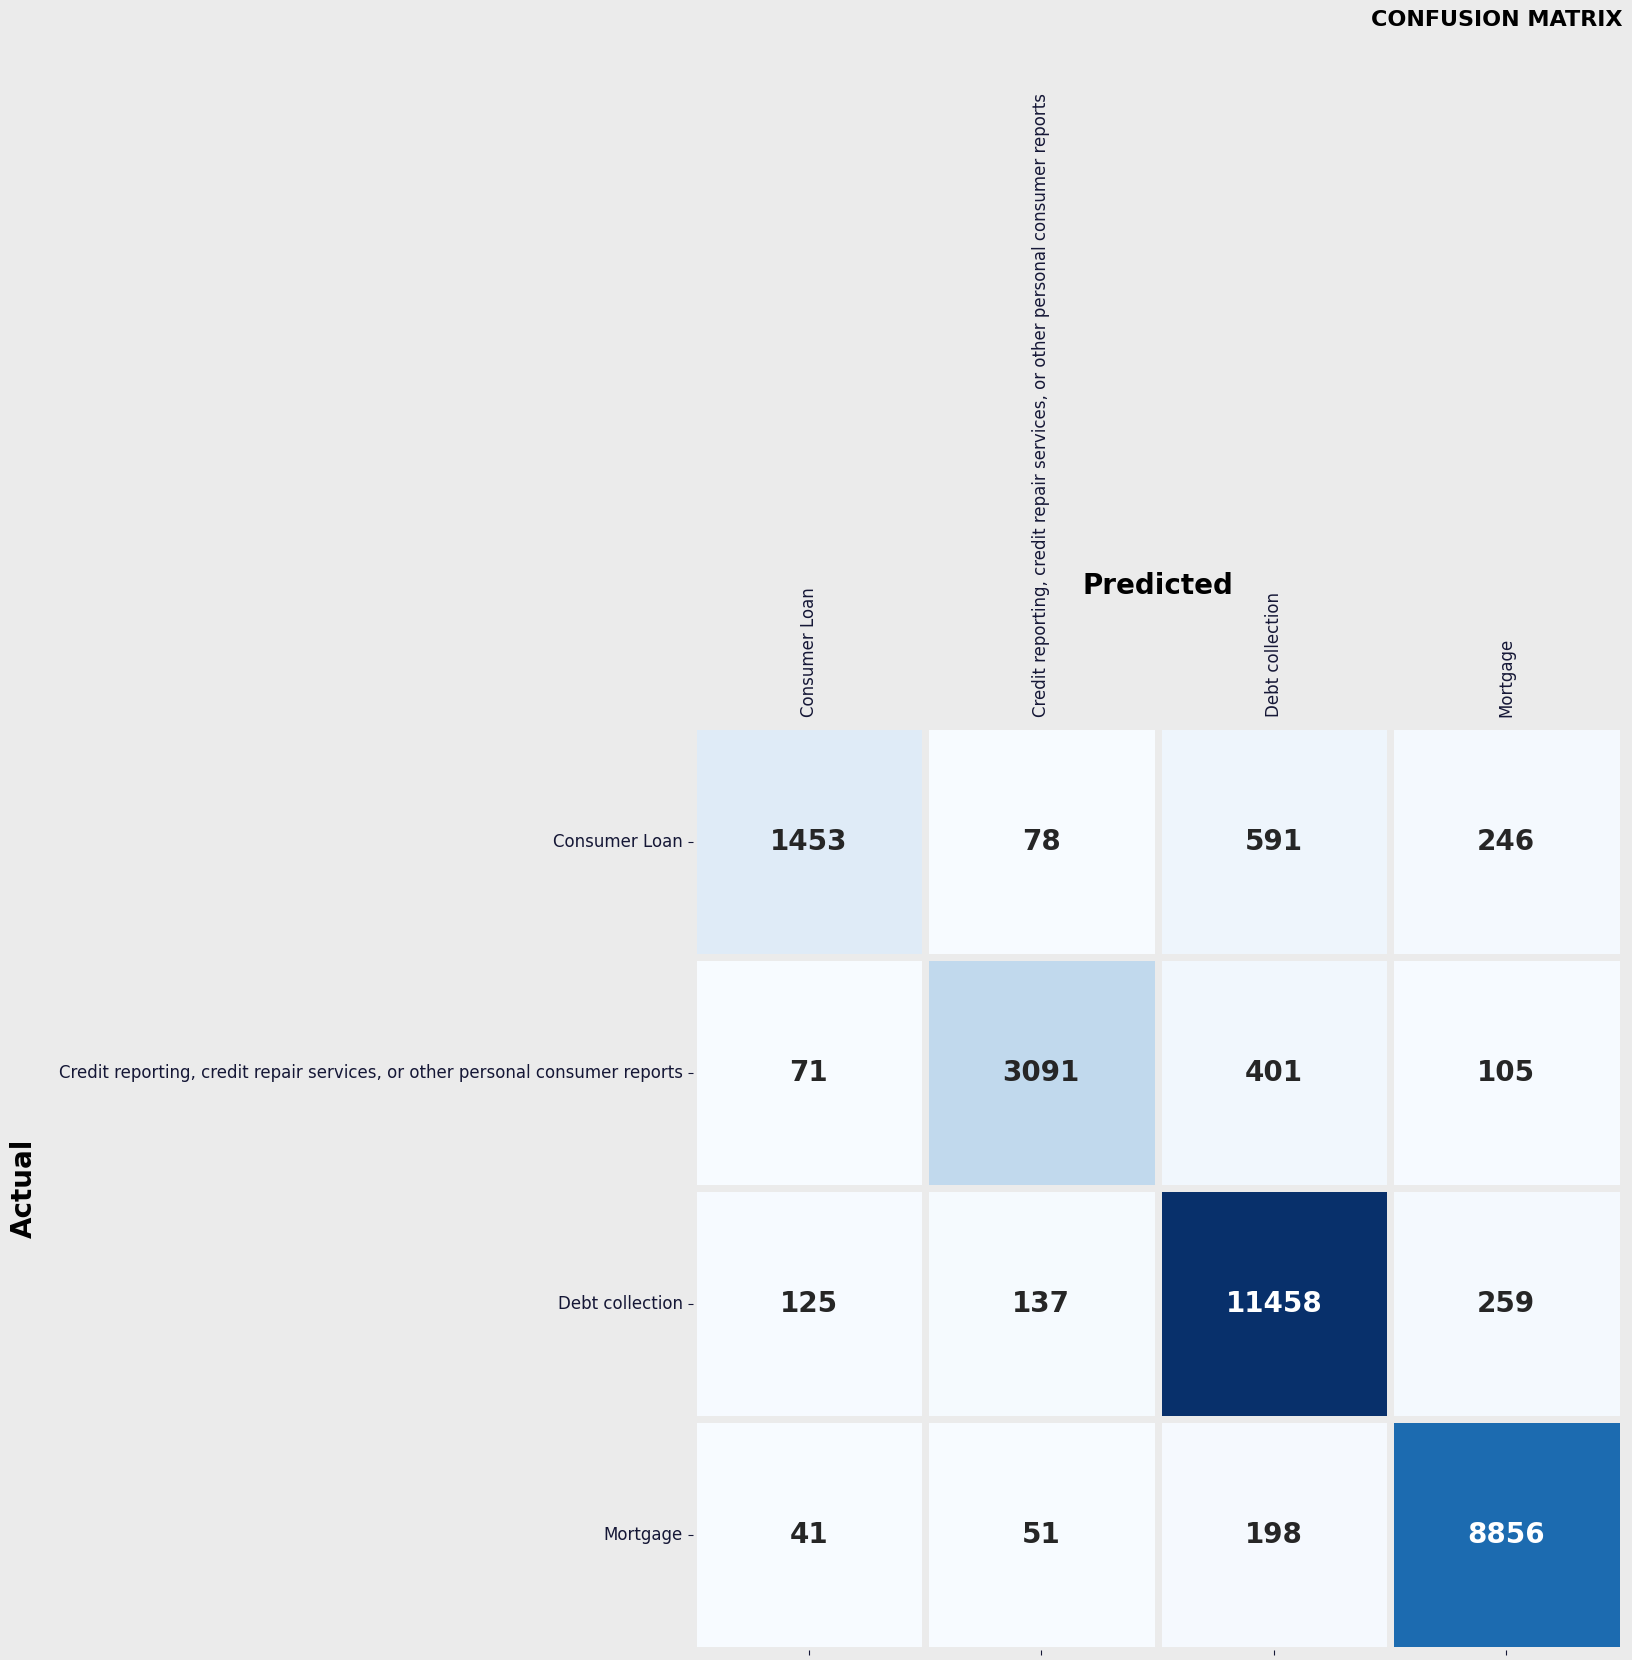

In [48]:
cm = confusion_matrix(y_test, preds, labels=encoder.classes_)
plot_confusion_matrix(cm=cm,labels=encoder.classes_, size=12, rotate_labels=True)

In [50]:
# Sample text for inference
sample_text = "I have a complaint on my mortgage, the amount was not debited from my account."

# Vectorize the sample text using the same TfidfVectorizer
sample_text_vec = vectorizer.transform([sample_text])

# Select the top features using the same SelectKBest instance
sample_text_sp = ch2.transform(sample_text_vec)

# Convert the sparse matrix to a dense one
sample_text_dense = pd.DataFrame(data=sample_text_sp.toarray(), columns=cols)

# Predict using the trained Random Forest model
prediction = loaded_rf_model.predict(sample_text_dense)

# Inverse transform the prediction to get the actual product
predicted_product = encoder.inverse_transform(prediction)

# Print the predicted product
print("Predicted Product:", predicted_product[0])


Predicted Product: Mortgage
